In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#reading the dataset
df = pd.read_csv('/content/Netflix Userbase.csv')
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [4]:
df.shape

(2500, 10)

In [5]:
df.nunique()

User ID              2500
Subscription Type       3
Monthly Revenue         6
Join Date             300
Last Payment Date      26
Country                10
Age                    26
Gender                  2
Device                  4
Plan Duration           1
dtype: int64

In [6]:
df.isnull().values.any()

False

In [7]:
df.duplicated().sum()

0

In [8]:
#checking nulll values in eac column
print(df.isnull().sum())
print()

User ID              0
Subscription Type    0
Monthly Revenue      0
Join Date            0
Last Payment Date    0
Country              0
Age                  0
Gender               0
Device               0
Plan Duration        0
dtype: int64



In [9]:
#exploring varibles and finding the paterns

print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['User ID', 'Subscription Type', 'Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age', 'Gender', 'Device', 'Plan Duration']


In [10]:
df["Subscription Type"]

0          Basic
1        Premium
2       Standard
3       Standard
4          Basic
          ...   
2495     Premium
2496       Basic
2497    Standard
2498    Standard
2499       Basic
Name: Subscription Type, Length: 2500, dtype: object

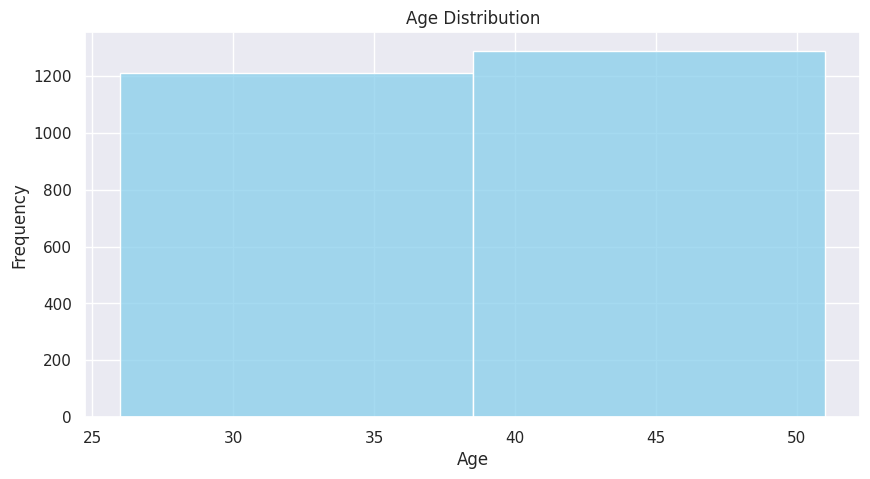

In [11]:
#age distribution
sns.set_theme()

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="Age", binwidth=10, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


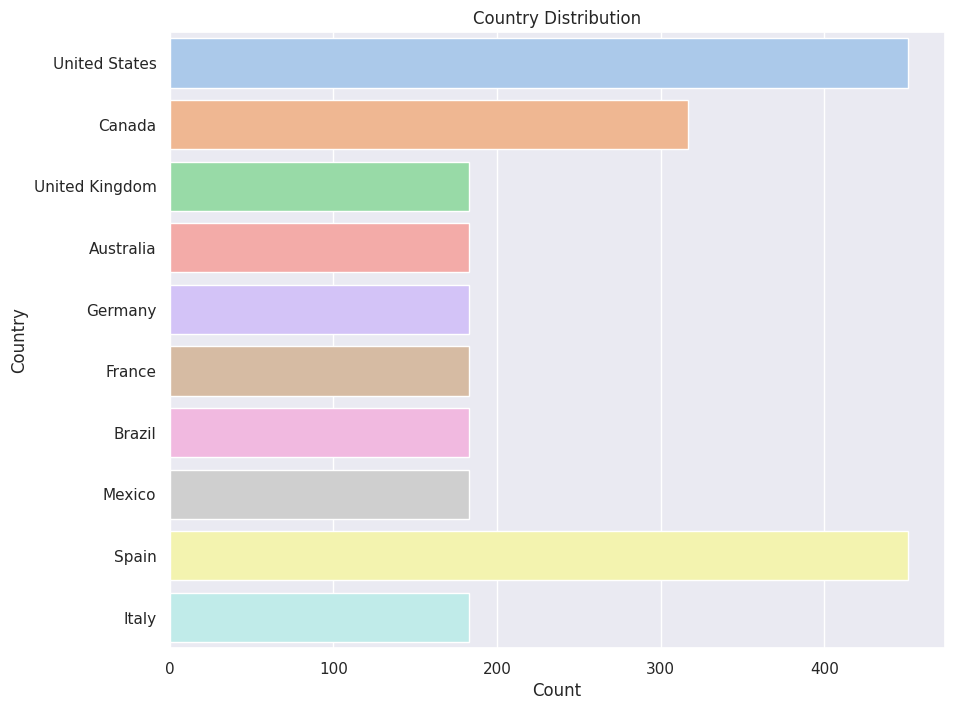

In [12]:
#country distribution demograph
sns.set_theme()

plt.figure(figsize=(10, 8))
sns.countplot(y="Country", data=df, hue="Country", palette='pastel', legend=False)
plt.title('Country Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [13]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [14]:
df.Device.unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [15]:
df["Join Date"] = pd.to_datetime(df["Join Date"])

<ipython-input-15-52a2c2cfda40>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Join Date"] = pd.to_datetime(df["Join Date"])


In [16]:
df["Subscription Type"] = df["Subscription Type"].astype(str)

Checking the people joining in 2021

In [17]:
#checking on people joining in year 2021

df['Join Date'] = pd.to_datetime(df['Join Date'])
users_joined_since_2023 = df[df['Join Date'].dt.year >= 2023]
num_users_joined_since_2023 = len(users_joined_since_2023)

print("Number of users who joined since 2023:", num_users_joined_since_2023)

Number of users who joined since 2023: 38


In [18]:
print(users_joined_since_2023.head())

    User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
2         3          Standard               12 2023-02-28          27-06-23   
4         5             Basic               10 2023-01-05          28-06-23   
7         8             Basic               10 2023-02-04          24-06-23   
9        10           Premium               15 2023-07-01          22-06-23   
11       12           Premium               15 2023-03-23          28-06-23   

           Country  Age  Gender      Device Plan Duration  
2   United Kingdom   42    Male    Smart TV       1 Month  
4          Germany   33    Male  Smartphone       1 Month  
7           Mexico   39  Female      Laptop       1 Month  
9            Italy   44  Female    Smart TV       1 Month  
11          Canada   45    Male      Tablet       1 Month  


In [19]:
yearly_counts = df['Join Date'].groupby(df['Join Date'].dt.year).count()

print("Yearly counts of users joining:\n")
print(yearly_counts)

Yearly counts of users joining:

Join Date
2021      14
2022    2448
2023      38
Name: Join Date, dtype: int64


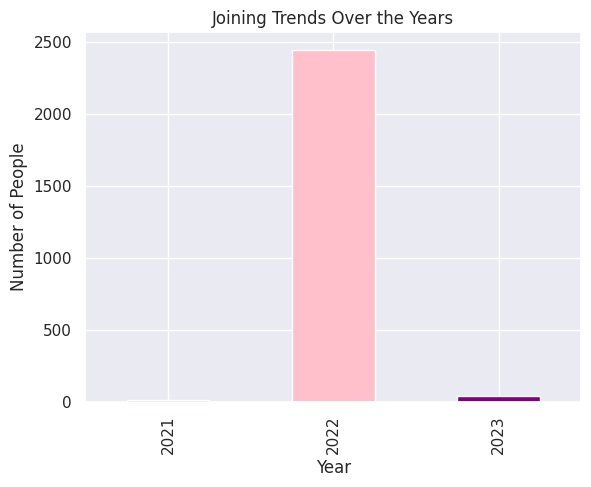

In [20]:
colors = ['red', 'pink', 'purple']

yearly_counts.plot(kind="bar", color=colors)
plt.title("Joining Trends Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   User ID            2500 non-null   int64         
 1   Subscription Type  2500 non-null   object        
 2   Monthly Revenue    2500 non-null   int64         
 3   Join Date          2500 non-null   datetime64[ns]
 4   Last Payment Date  2500 non-null   object        
 5   Country            2500 non-null   object        
 6   Age                2500 non-null   int64         
 7   Gender             2500 non-null   object        
 8   Device             2500 non-null   object        
 9   Plan Duration      2500 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 195.4+ KB


In [22]:
df['Last Payment Date']= pd.to_datetime(df['Last Payment Date'])

<ipython-input-22-fe401ffe6b63>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Last Payment Date']= pd.to_datetime(df['Last Payment Date'])


**Checking the type of subscription over the years**

In [23]:
#now checking the types of subscription over the years

In [24]:
subscriptions = df["Subscription Type"].unique()
subscriptions

array(['Basic', 'Premium', 'Standard'], dtype=object)

In [25]:
df['Join Date'].dt.year.unique()

array([2022, 2021, 2023], dtype=int32)

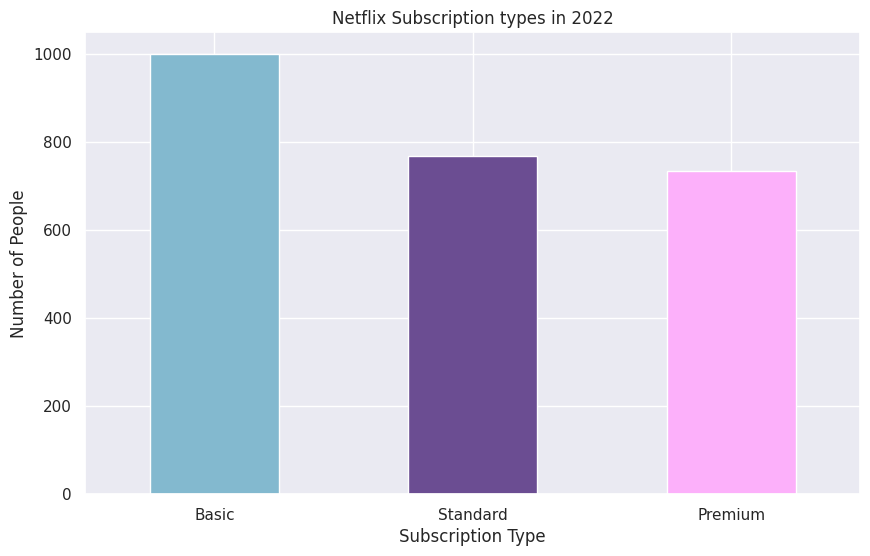

In [26]:
subscription_counts = df['Subscription Type'].value_counts()

custom_palette = ["#83B9CF", "#6B4D92", "#FCB0FA"]

subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6),color=custom_palette)
plt.title('Netflix Subscription types in 2022')
plt.xlabel('Subscription Type')
plt.ylabel('Number of People')
plt.xticks(rotation=0)
plt.show()

What countries genereate the most revenue?


In [27]:
nut = df["Monthly Revenue"].sum()
nut

31271

In [28]:
country_revenue = df.sort_values("Monthly Revenue", ascending=False).head(10)
country_revenue

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
2499,2500,Basic,15,2022-08-13,2023-12-07,United States,35,Female,Smart TV,1 Month
2334,2335,Premium,15,2022-08-09,2023-10-07,United States,45,Male,Laptop,1 Month
2425,2426,Premium,15,2022-07-23,2023-12-07,United States,51,Male,Smartphone,1 Month
2426,2427,Basic,15,2022-03-08,2023-07-14,Canada,28,Female,Smartphone,1 Month
379,380,Basic,15,2022-05-08,2023-06-27,Italy,27,Female,Smart TV,1 Month
1648,1649,Premium,15,2022-06-27,2023-05-07,Australia,30,Male,Tablet,1 Month
1647,1648,Standard,15,2022-06-30,2023-06-07,United Kingdom,41,Female,Smartphone,1 Month
1645,1646,Basic,15,2022-07-07,2023-09-07,United States,46,Female,Tablet,1 Month
954,955,Basic,15,2022-06-20,2023-02-07,United States,36,Female,Laptop,1 Month
959,960,Basic,15,2022-07-15,2023-06-30,Germany,46,Female,Tablet,1 Month


<ipython-input-29-7c263b25a605>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Monthly Revenue', y='Country', errorbar=None, estimator="sum", data=df, palette="Set3")


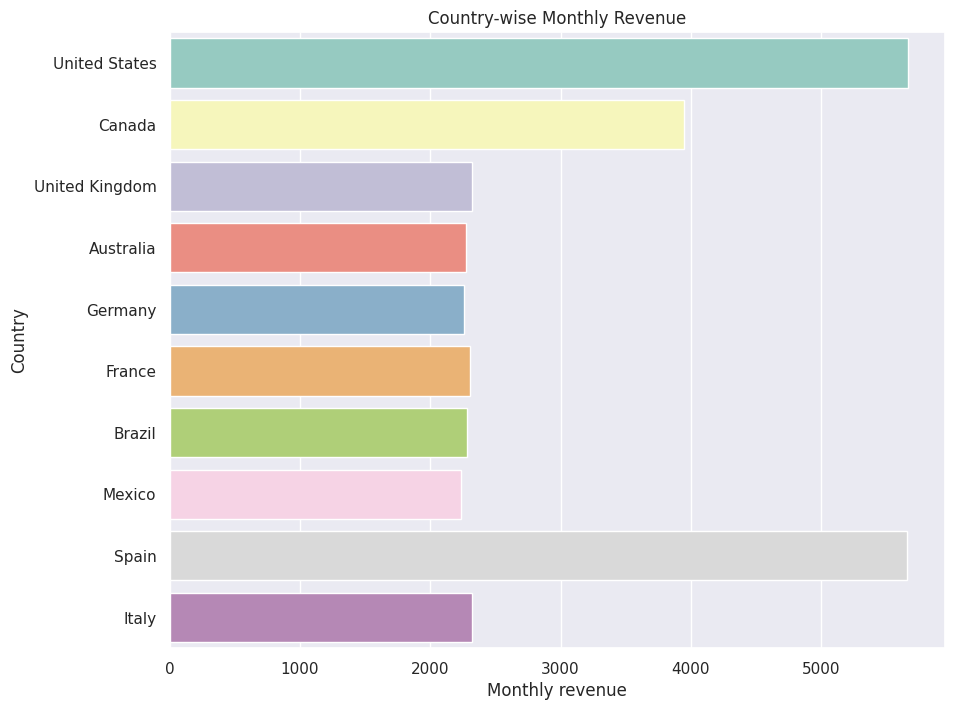

In [29]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Monthly Revenue', y='Country', errorbar=None, estimator="sum", data=df, palette="Set3")
plt.title('Country-wise Monthly Revenue')
plt.xlabel('Monthly revenue')
plt.ylabel('Country')
plt.show()

And how much revenue are they generating from its users

<ipython-input-30-87d9857ed135>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Subscription Type", y="Monthly Revenue", data= df, palette='pastel', ax=axes[0])
<ipython-input-30-87d9857ed135>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y="Country", x="Monthly Revenue", data=df, palette='pastel', ax=axes[1])
<ipython-input-30-87d9857ed135>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Device", y="Monthly Revenue", data=df, palette='pastel', ax=axes[2])


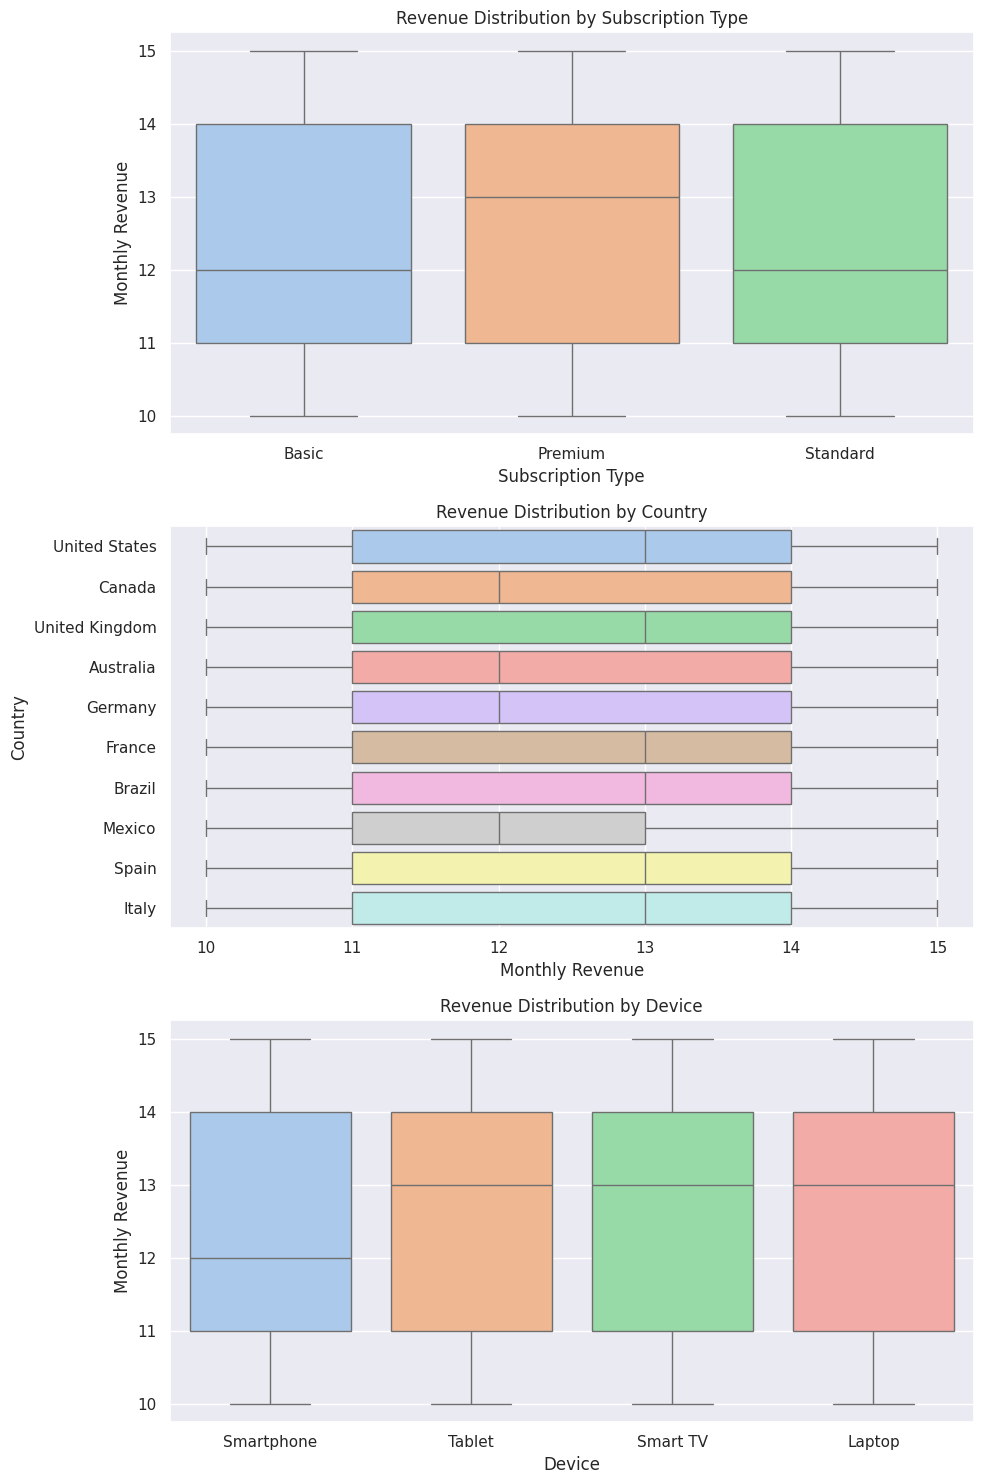

In [30]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sns.boxplot(x="Subscription Type", y="Monthly Revenue", data= df, palette='pastel', ax=axes[0])
axes[0].set_title('Revenue Distribution by Subscription Type')

sns.boxplot(y="Country", x="Monthly Revenue", data=df, palette='pastel', ax=axes[1])
axes[1].set_title('Revenue Distribution by Country')

sns.boxplot(x="Device", y="Monthly Revenue", data=df, palette='pastel', ax=axes[2])
axes[2].set_title('Revenue Distribution by Device')

plt.tight_layout()
plt.show()


In [31]:
# Define a function to map subscription types to monthly charges
def map_subscription_to_charge(subscription_type):
    if subscription_type == "Standard":
        return 300
    elif subscription_type == "Basic":
        return 500
    elif subscription_type == "Premium":
        return 700
    else:
        return None

df['Monthly Charges'] = df['Subscription Type'].apply(map_subscription_to_charge)

In [32]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Monthly Charges
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,500
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,700
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,300
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,300
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,500


In [33]:
#creating the tenure column
df['Join Date'] = pd.to_datetime(df['Join Date'])
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'])

df['Tenure'] = (df['Last Payment Date'] - df['Join Date']).dt.days

print(df[['Join Date', 'Last Payment Date', 'Tenure']].head())

   Join Date Last Payment Date  Tenure
0 2022-01-15        2023-10-06     629
1 2021-05-09        2023-06-22     774
2 2023-02-28        2023-06-27     119
3 2022-10-07        2023-06-26     262
4 2023-01-05        2023-06-28     174


In [34]:
from datetime import datetime

join_date = datetime.strptime('2022-01-15', '%Y-%m-%d')
last_payment_date = datetime.strptime('2023-10-06', '%Y-%m-%d')

difference = last_payment_date - join_date

print(difference)

629 days, 0:00:00


In [35]:
#(assuming 30 days per month)
avg_days_per_month = 30
df['Tenure'] = df['Tenure'] / avg_days_per_month

print(df[['Join Date', 'Last Payment Date', 'Tenure']].head())

   Join Date Last Payment Date     Tenure
0 2022-01-15        2023-10-06  20.966667
1 2021-05-09        2023-06-22  25.800000
2 2023-02-28        2023-06-27   3.966667
3 2022-10-07        2023-06-26   8.733333
4 2023-01-05        2023-06-28   5.800000


In [36]:
df['Tenure'] = df['Tenure'].round().astype(int)

print(df[['Join Date', 'Last Payment Date', 'Tenure']].head())

   Join Date Last Payment Date  Tenure
0 2022-01-15        2023-10-06      21
1 2021-05-09        2023-06-22      26
2 2023-02-28        2023-06-27       4
3 2022-10-07        2023-06-26       9
4 2023-01-05        2023-06-28       6


In [37]:
df.to_csv('/content/Netflix Userbase.csv', index=False)

In [38]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Monthly Charges,Tenure
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,500,21
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,700,26
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,300,4
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,300,9
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,500,6


In [39]:
negative_tenure_count = (df['Tenure'] < 0).sum()
print("Number of negative tenure values:", negative_tenure_count)

Number of negative tenure values: 10


In [40]:
df['Tenure'] = df['Tenure'].abs()

print(df[['Join Date', 'Last Payment Date', 'Tenure']].head(10))

   Join Date Last Payment Date  Tenure
0 2022-01-15        2023-10-06      21
1 2021-05-09        2023-06-22      26
2 2023-02-28        2023-06-27       4
3 2022-10-07        2023-06-26       9
4 2023-01-05        2023-06-28       6
5 2022-03-18        2023-06-27      16
6 2021-09-12        2023-06-25      22
7 2023-02-04        2023-06-24       5
8 2022-10-20        2023-06-23       8
9 2023-07-01        2023-06-22       0


In [41]:
np.random.seed(42)
df['Churn'] = np.random.choice(['Yes', 'No'], size=len(df))

indices = df[df['Tenure'] < 10].sample(n=600).index
df.loc[indices, 'Churn'] = 'Yes'

In [42]:
df.to_csv('/content/Netflix Userbase.csv', index=False)

In [43]:
churned_count = (df['Churn'] == 'Yes').sum()
non_churned_count = (df['Churn'] == 'No').sum()

print("Number of churned customers (Yes):", churned_count)
print("Number of non-churned customers (No):", non_churned_count)

Number of churned customers (Yes): 1559
Number of non-churned customers (No): 941


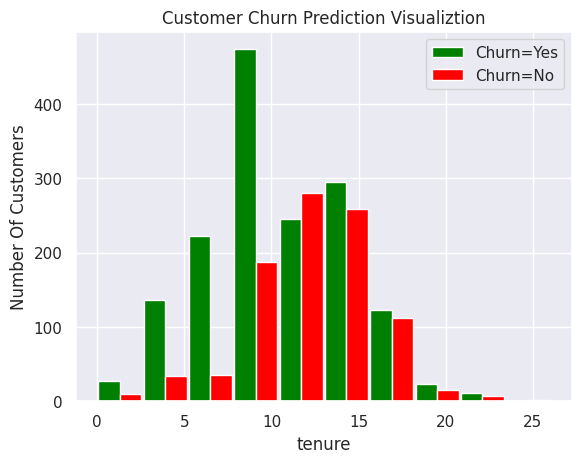

In [44]:
tenure_churn_no = df[df.Churn=='No'].Tenure
tenure_churn_yes = df[df.Churn=='Yes'].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

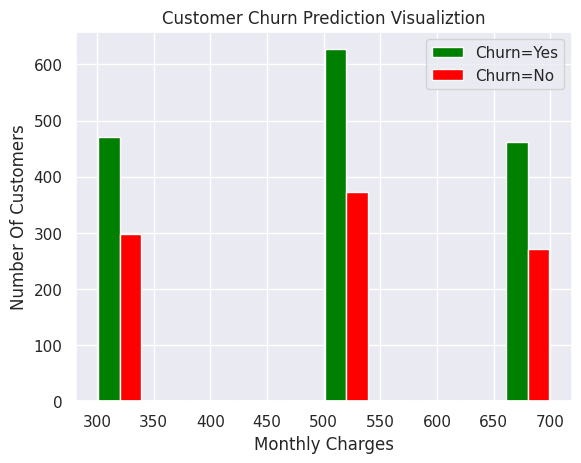

In [45]:
mc_churn_no = df[df.Churn=='No']['Monthly Charges']
mc_churn_yes = df[df.Churn=='Yes']['Monthly Charges']

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [46]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df)

Subscription Type: ['Basic' 'Premium' 'Standard']
Country: ['United States' 'Canada' 'United Kingdom' 'Australia' 'Germany' 'France'
 'Brazil' 'Mexico' 'Spain' 'Italy']
Gender: ['Male' 'Female']
Device: ['Smartphone' 'Tablet' 'Smart TV' 'Laptop']
Plan Duration: ['1 Month']
Churn: ['Yes' 'No']


In [47]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Monthly Charges,Tenure,Churn
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,500,21,Yes
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,700,26,No
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,300,4,Yes
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,300,9,Yes
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,500,6,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-12-07,Spain,28,Female,Smart TV,1 Month,700,17,No
2496,2497,Basic,15,2022-04-08,2023-07-14,Spain,33,Female,Smart TV,1 Month,500,15,No
2497,2498,Standard,12,2022-09-08,2023-07-15,United States,38,Male,Laptop,1 Month,300,10,No
2498,2499,Standard,13,2022-12-08,2023-12-07,Canada,48,Female,Tablet,1 Month,300,12,Yes


In [48]:
unique_values = {
    'OnlineSecurity': ['No', 'Yes'],
    'OnlineBackup': ['Yes', 'No'],
    'DeviceProtection': ['No', 'Yes'],
    'TechSupport': ['No', 'Yes'],
    'StreamingTV': ['No', 'Yes'],
    'StreamingMovies': ['No', 'Yes']
}

for col, values in unique_values.items():
    df[col] = np.random.choice(values, size=len(df))

print(df.head())

   User ID Subscription Type  Monthly Revenue  Join Date Last Payment Date  \
0        1             Basic               10 2022-01-15        2023-10-06   
1        2           Premium               15 2021-05-09        2023-06-22   
2        3          Standard               12 2023-02-28        2023-06-27   
3        4          Standard               12 2022-10-07        2023-06-26   
4        5             Basic               10 2023-01-05        2023-06-28   

          Country  Age  Gender      Device Plan Duration  Monthly Charges  \
0   United States   28    Male  Smartphone       1 Month              500   
1          Canada   35  Female      Tablet       1 Month              700   
2  United Kingdom   42    Male    Smart TV       1 Month              300   
3       Australia   51  Female      Laptop       1 Month              300   
4         Germany   33    Male  Smartphone       1 Month              500   

   Tenure Churn OnlineSecurity OnlineBackup DeviceProtection TechSup

In [49]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Monthly Charges,Tenure,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,500,21,Yes,Yes,No,Yes,Yes,No,Yes
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,700,26,No,Yes,No,Yes,No,No,Yes
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,300,4,Yes,Yes,Yes,Yes,No,Yes,No
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,300,9,Yes,Yes,No,Yes,No,Yes,No
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,500,6,Yes,Yes,Yes,Yes,No,Yes,No


In [50]:
df.to_csv('/content/Netflix Userbase.csv', index=False)

Now converting yes and no to 0,s and 1,s


In [51]:
yes_no_columns = ['Churn','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [52]:
df.head(5)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,Monthly Charges,Tenure,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,Basic,10,2022-01-15,2023-10-06,United States,28,Male,Smartphone,1 Month,500,21,1,1,0,1,1,0,1
1,2,Premium,15,2021-05-09,2023-06-22,Canada,35,Female,Tablet,1 Month,700,26,0,1,0,1,0,0,1
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,300,4,1,1,1,1,0,1,0
3,4,Standard,12,2022-10-07,2023-06-26,Australia,51,Female,Laptop,1 Month,300,9,1,1,0,1,0,1,0
4,5,Basic,10,2023-01-05,2023-06-28,Germany,33,Male,Smartphone,1 Month,500,6,1,1,1,1,0,1,0


In [53]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [54]:
df.Gender.unique()

array([0, 1])

Now one hot encoding for categorial columns (with more than 2 types of values)


In [62]:
df.columns

Index(['Subscription Type', 'Monthly Revenue', 'Join Date',
       'Last Payment Date', 'Country', 'Age', 'Gender', 'Device',
       'Plan Duration', 'Monthly Charges', 'Tenure', 'Churn', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies'],
      dtype='object')

In [63]:
df_encoded = pd.get_dummies(data=df, columns=['Plan Duration','Subscription Type','Device'])
df_encoded.columns

Index(['Monthly Revenue', 'Join Date', 'Last Payment Date', 'Country', 'Age',
       'Gender', 'Monthly Charges', 'Tenure', 'Churn', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Plan Duration_1 Month', 'Subscription Type_Basic',
       'Subscription Type_Premium', 'Subscription Type_Standard',
       'Device_Laptop', 'Device_Smart TV', 'Device_Smartphone',
       'Device_Tablet'],
      dtype='object')

In [64]:
df_encoded.sample(5)

,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Monthly Charges,Tenure,Churn,OnlineSecurity,...,StreamingTV,StreamingMovies,Plan Duration_1 Month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
2155,10,2022-07-09,2023-07-13,United States,37,0,700,12,0,1,...,1,0,True,False,True,False,False,True,False,False
2209,11,2022-07-13,2023-11-07,Italy,27,0,500,16,1,1,...,0,1,True,True,False,False,False,False,True,False
1008,14,2022-05-07,2023-02-07,Spain,31,1,300,9,0,1,...,0,0,True,False,False,True,True,False,False,False
417,14,2022-10-21,2023-06-27,Mexico,47,1,300,8,0,0,...,0,1,True,False,False,True,False,True,False,False
2266,11,2022-08-15,2023-10-07,Brazil,36,1,500,14,0,1,...,1,1,True,True,False,False,False,False,True,False


In [69]:
columns_to_convert = ['Plan Duration_1 Month', 'Subscription Type_Basic', 'Subscription Type_Premium',
                      'Subscription Type_Standard', 'Device_Laptop', 'Device_Smart TV',
                      'Device_Smartphone', 'Device_Tablet']

df_encoded[columns_to_convert] = df_encoded[columns_to_convert].astype(int)

In [70]:
df_encoded.sample(5)

,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Monthly Charges,Tenure,Churn,OnlineSecurity,...,StreamingTV,StreamingMovies,Plan Duration_1 Month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
1953,11,2022-10-10,2023-11-07,Spain,43,0,300,13,0,0,...,0,0,1,0,0,1,1,0,0,0
1252,11,2022-09-27,2023-02-07,United States,48,0,300,4,1,1,...,1,1,1,0,0,1,1,0,0,0
965,12,2022-08-16,2023-04-07,Spain,42,1,700,8,1,1,...,0,1,1,0,1,0,1,0,0,0
1067,15,2022-10-21,2023-04-07,Mexico,34,1,300,6,1,1,...,0,0,1,0,0,1,0,0,0,1
2480,10,2022-05-08,2023-12-07,Spain,33,1,700,19,1,0,...,0,1,1,0,1,0,1,0,0,0


In [73]:
df_encoded.dtypes

Monthly Revenue                        int64
Join Date                     datetime64[ns]
Last Payment Date             datetime64[ns]
Country                               object
Age                                    int64
Gender                                 int64
Monthly Charges                        int64
Tenure                                 int64
Churn                                  int64
OnlineSecurity                         int64
OnlineBackup                           int64
DeviceProtection                       int64
TechSupport                            int64
StreamingTV                            int64
StreamingMovies                        int64
Plan Duration_1 Month                  int64
Subscription Type_Basic                int64
Subscription Type_Premium              int64
Subscription Type_Standard             int64
Device_Laptop                          int64
Device_Smart TV                        int64
Device_Smartphone                      int64
Device_Tab

In [77]:
df_encoded.head(5)

,Monthly Revenue,Join Date,Last Payment Date,Age,Gender,Monthly Charges,Tenure,Churn,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Plan Duration_1 Month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
0,10,2022-01-15,2023-10-06,28,0,500,21,1,1,0,...,0,1,1,1,0,0,0,0,1,0
1,15,2021-05-09,2023-06-22,35,1,700,26,0,1,0,...,0,1,1,0,1,0,0,0,0,1
2,12,2023-02-28,2023-06-27,42,0,300,4,1,1,1,...,1,0,1,0,0,1,0,1,0,0
3,12,2022-10-07,2023-06-26,51,1,300,9,1,1,0,...,1,0,1,0,0,1,1,0,0,0
4,10,2023-01-05,2023-06-28,33,0,500,6,1,1,1,...,1,0,1,1,0,0,0,0,1,0


Scaling few columns

In [82]:
df_encoded.drop(columns=['Join Date', 'Last Payment Date'], inplace=True)

In [80]:
from sklearn.preprocessing import MinMaxScaler
cols_to_scale = ['Tenure','Monthly Charges','Monthly Revenue','Age']
scaler = MinMaxScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

In [83]:
df_encoded.sample(5)

,Monthly Revenue,Age,Gender,Monthly Charges,Tenure,Churn,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Plan Duration_1 Month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
1197,0.0,0.48,1,0.0,0.576923,1,1,1,1,1,0,0,1,0,0,1,1,0,0,0
933,0.2,0.32,1,0.0,0.269231,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0
443,0.0,0.96,1,1.0,0.461538,0,1,0,0,1,1,1,1,0,1,0,0,0,1,0
1110,0.6,1.00,0,1.0,0.115385,1,1,1,0,1,1,0,1,0,1,0,0,1,0,0
1128,0.8,0.44,1,0.0,0.307692,0,1,0,1,0,1,1,1,0,0,1,0,0,1,0


In [84]:
for col in df_encoded:
    print(f'{col}: {df_encoded[col].unique()}')

Monthly Revenue: [0.  1.  0.4 0.6 0.2 0.8]
Age: [0.08 0.36 0.64 1.   0.28 0.12 0.8  0.52 0.44 0.72 0.2  0.76 0.88 0.04
 0.48 0.4  0.16 0.68 0.24 0.6  0.   0.32 0.92 0.56 0.84 0.96]
Gender: [0 1]
Monthly Charges: [0.5 1.  0. ]
Tenure: [0.80769231 1.         0.15384615 0.34615385 0.23076923 0.61538462
 0.84615385 0.19230769 0.30769231 0.         0.5        0.11538462
 0.73076923 0.69230769 0.07692308 0.46153846 0.65384615 0.76923077
 0.03846154 0.42307692 0.26923077 0.38461538 0.53846154 0.88461538
 0.57692308]
Churn: [1 0]
OnlineSecurity: [1 0]
OnlineBackup: [0 1]
DeviceProtection: [1 0]
TechSupport: [1 0]
StreamingTV: [0 1]
StreamingMovies: [1 0]
Plan Duration_1 Month: [1]
Subscription Type_Basic: [1 0]
Subscription Type_Premium: [0 1]
Subscription Type_Standard: [0 1]
Device_Laptop: [0 1]
Device_Smart TV: [0 1]
Device_Smartphone: [1 0]
Device_Tablet: [0 1]


TRAIN SPLIT DATA

In [85]:
X = df_encoded.drop('Churn',axis='columns')
y = df_encoded['Churn']

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [87]:
X_train.shape

(2000, 19)

In [88]:
X_test.shape

(500, 19)

In [93]:
X_train[:5]

,Monthly Revenue,Age,Gender,Monthly Charges,Tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Plan Duration_1 Month,Subscription Type_Basic,Subscription Type_Premium,Subscription Type_Standard,Device_Laptop,Device_Smart TV,Device_Smartphone,Device_Tablet
2294,0.2,0.32,1,0.5,0.423077,0,1,0,0,1,0,1,1,0,0,0,1,0,0
945,0.8,0.68,1,1.0,0.230769,1,1,1,0,1,0,1,0,1,0,1,0,0,0
1865,0.4,0.64,0,1.0,0.576923,1,1,0,0,0,1,1,0,1,0,1,0,0,0
1149,1.0,0.48,0,0.5,0.538462,1,1,1,1,0,1,1,1,0,0,0,0,0,1
1624,0.0,1.00,1,0.5,0.192308,1,0,1,0,1,0,1,1,0,0,0,1,0,0


In [94]:
len(X_train.columns)

19

In [96]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(19, input_shape=(19,), activation='relu'),
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 2ms/step - loss: 0.6775 - accuracy: 0.6030
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6657 - accuracy: 0.6270
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6622 - accuracy: 0.6260
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.6275
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6575 - accuracy: 0.6265
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6554 - accuracy: 0.6285
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6280
Epoch 8/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6515 - accuracy: 0.6285
Epoch 9/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6497 - accuracy: 0.6300
Epoch 10/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6483 - accuracy: 0.6320
Epoch 11/

In [97]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 5ms/step - loss: 0.7113 - accuracy: 0.5760


[0.7112804651260376, 0.5759999752044678]

In [98]:
yp = model.predict(X_test)
yp[:5]

16/16 [==============================] - 0s 3ms/step


array([[0.91678065],
       [0.8754751 ],
       [0.4491758 ],
       [0.84643376],
       [0.6949113 ]], dtype=float32)

In [100]:
#now converting the yp 2d to 1d array

In [101]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [102]:
y_pred[:10]

[1, 1, 0, 1, 1, 0, 1, 1, 0, 1]

In [103]:
# Compareing  y_test and y_pred
for true_label, predicted_label in zip(y_test[:10], y_pred[:10]):
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")


True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 1
True Label: 1, Predicted Label: 0
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 1
True Label: 0, Predicted Label: 0
True Label: 1, Predicted Label: 1
True Label: 0, Predicted Label: 1
True Label: 1, Predicted Label: 0
True Label: 1, Predicted Label: 1


Classification report and Confusion Matrix

In [104]:
#performance of overall model first

from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.32      0.37       196
           1       0.63      0.74      0.68       304

    accuracy                           0.58       500
   macro avg       0.54      0.53      0.52       500
weighted avg       0.56      0.58      0.56       500



Confusion Matrix

Text(91.25, 0.5, 'Truth')

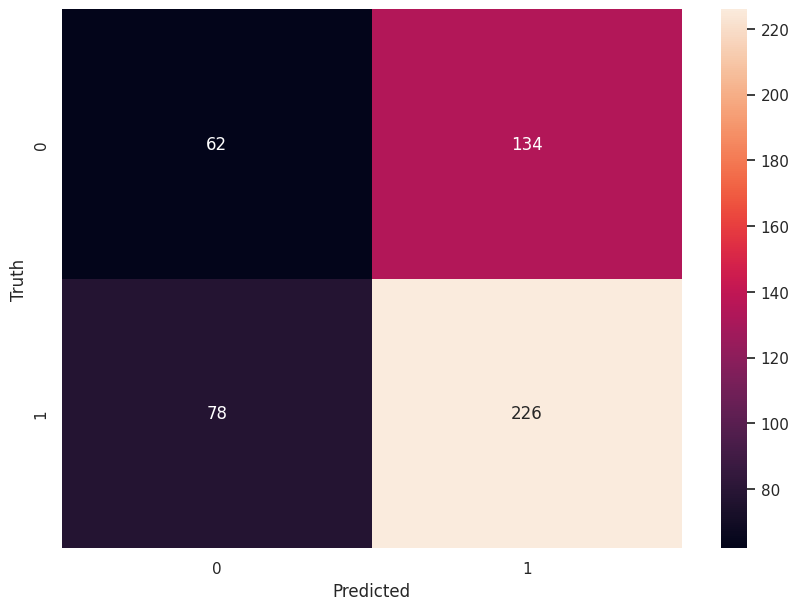

In [105]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Therfore,
Total errors in the model : 78+134 = 212
And Correct predictions: 226+62 = 288

In [106]:
y_test.shape

(500,)

In [107]:
#Accuracy
round((62+226)/(500),2)

0.58

Precision for 0 class. i.e. Precision for customers who did not churn

In [108]:
round(62/(62+78),2)

0.44

Precision for 1 class. i.e. Precision for customers who actually churned

In [109]:
round(226/(226+134),2)

0.63

In Conlcusion in this project
I have built a Netflix customer churn prediction model using artificial neural network or ANN. Customer churn measures how and why are customers leaving the business. i have used Netflix churn dataset and build a deep learning model for churn prediction.I have also shown precision,recalll and accuracy of this model by using confusion matrix and classification report.